In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image, HTML, display
import PIL 
import IPython
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import requests, io


In [2]:
book=pd.read_csv("Books.csv")
book.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
book.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [4]:
book.shape

(271360, 8)

In [5]:
book.drop(['Image-URL-S','Image-URL-M'],axis=1,inplace=True)

In [6]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [7]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-L            3
dtype: int64

In [8]:
book.fillna("other",inplace=True)

In [9]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-L            0
dtype: int64

In [10]:
book.shape

(271360, 6)

In [11]:
user=pd.read_csv("Users.csv")

In [12]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
user.shape

(278858, 3)

In [14]:
user.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [15]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [16]:
user.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

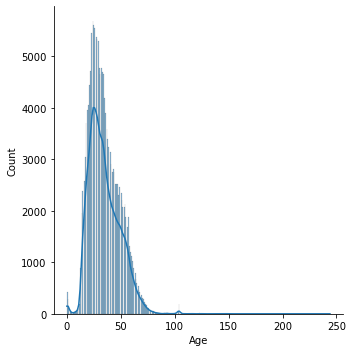

In [17]:
sns.displot(user['Age'],kde=True)

In [18]:
user['Age'].max()

244.0

In [19]:
user['Age'].loc[(user['Age']>100 )|(user['Age']<=0)]=np.nan

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
user.fillna(user.Age.median(),inplace=True)

In [22]:
user.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [23]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


In [24]:
user.Age.max()

100.0

In [25]:
book.loc[book['Publisher']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
63,2070423204,Lieux dits,Michel Tournier,2002,Gallimard,http://images.amazon.com/images/P/2070423204.0...
731,2070417743,Chroniques martiennes,Ray Bradbury,2002,Gallimard,http://images.amazon.com/images/P/2070417743.0...
733,2070384349,La Faute de l'abbÃ?Â© Mouret,Emile Zola,1991,Gallimard,http://images.amazon.com/images/P/2070384349.0...
1613,2070417700,Deus Irae,Philip Kindred Dick,2001,Gallimard,http://images.amazon.com/images/P/2070417700.0...
1614,2070360075,Le Vieil Homme et la Mer,Ernest Hemingway,1972,Gallimard,http://images.amazon.com/images/P/2070360075.0...
...,...,...,...,...,...,...
270315,207036965X,Black Boy,Richard Wright,1974,Gallimard,http://images.amazon.com/images/P/207036965X.0...
270316,207037226X,Le Sang noir,Guilloux,1980,Gallimard,http://images.amazon.com/images/P/207037226X.0...
270778,2070364569,Ennemonde et autres caractÃ?Â¨res,Jean Giono,1973,Gallimard,http://images.amazon.com/images/P/2070364569.0...
270779,2070426297,H4Blues,Jean-Bernard Pouy,2003,Gallimard,http://images.amazon.com/images/P/2070426297.0...


In [26]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [27]:
book.loc[book['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,other


In [28]:
url=book['Publisher'].loc[book['ISBN']=='2070426769']
book['Image-URL-L'].loc[book['ISBN']=='2070426769']=url
book['Year-Of-Publication'].loc[book['Year-Of-Publication']=='Gallimard']=2003
book['Publisher'].loc[book['ISBN']=='2070426769']='Gallimard'
book['Book-Author'].loc[book['ISBN']=='2070426769']='Jean-Marie Gustave Le ClÃ?Â©zio'
book['Book-Title'].loc[book['ISBN']=='2070426769']="Peuple du ciel, suivi de 'Les Bergers'"


In [29]:
book.loc[book['ISBN']=='2070426769']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers'",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [30]:
book.loc[book['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,other
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,other


In [31]:
book['Book-Title'].loc[book['ISBN']=='078946697X']

209538    DK Readers: Creating the X-Men, How It All Beg...
Name: Book-Title, dtype: object

In [32]:
url=book['Publisher'].loc[book['ISBN']=='078946697X']
book['Image-URL-L'].loc[book['ISBN']=='078946697X']=url
book['Year-Of-Publication'].loc[book['Year-Of-Publication']=='DK Publishing Inc']=2000
book['Publisher'].loc[book['ISBN']=='078946697X']='DK Publishing Inc'
book['Book-Author'].loc[book['ISBN']=='078946697X']='Michael Teitelbaum'
book['Book-Title'].loc[book['ISBN']=='078946697X']="DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [33]:
book.loc[book['ISBN']=='078946697X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...


In [34]:
url=book['Publisher'].loc[book['ISBN']=='0789466953']
book['Image-URL-L'].loc[book['ISBN']=='0789466953']=url
book['Publisher'].loc[book['ISBN']=='0789466953']='DK Publishing Inc'
book['Book-Author'].loc[book['ISBN']=='0789466953']='James Buckley'
book['Book-Title'].loc[book['ISBN']=='0789466953']="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [35]:
book.loc[book['ISBN']=='0789466953']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [36]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [37]:
book['Year-Of-Publication']=book['Year-Of-Publication'].astype(int)

In [38]:
book['Year-Of-Publication'].loc[(book['Year-Of-Publication']>2021)|(book['Year-Of-Publication']==0)]=np.nan

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
book['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924.,
       1921., 1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935.,
       1806., 2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922.,
       1897., 1376.])

In [40]:
t=round(book['Year-Of-Publication'].mean())
book['Year-Of-Publication'].fillna(t,inplace=True)

In [41]:
book['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923., 2020.,
       1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928., 1929.,
       1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924., 1921.,
       1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935., 1806.,
       2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922., 1897.,
       1376.])

In [42]:
rating=pd.read_csv('Ratings.csv')
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [43]:
rating.shape

(1149780, 3)

<AxesSubplot:ylabel='Book-Rating'>

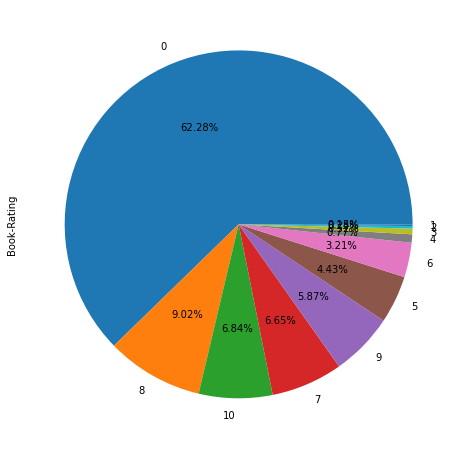

In [44]:
rating['Book-Rating'].value_counts().plot(kind="pie", autopct='%.2f%%', figsize=(8,8))

In [45]:
br=rating['User-ID'].value_counts()>20

In [46]:
y=br[br].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
              3578, 216211, 119859,  31742,  78328, 123503, 154409,  21912,
            168307, 262525],
           dtype='int64', length=7078)

In [47]:
rating=rating[rating["User-ID"].isin(y)]

In [48]:
rating.head()

,User-ID,ISBN,Book-Rating
31,276762,034544003X,0
32,276762,0380000059,0
33,276762,0380711524,5
34,276762,0451167317,0
35,276762,0451454952,0


In [49]:
rating.shape

(883064, 3)

In [50]:
bookrating=rating.merge(book,on='ISBN')

In [51]:
bookrating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,276762,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...
1,29259,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...
2,35050,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...
3,98391,034544003X,9,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...
4,134797,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

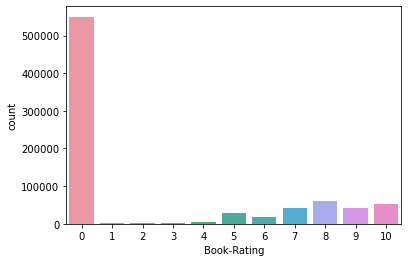

In [52]:
sns.countplot(data=bookrating,x="Book-Rating")

In [53]:
norating=bookrating.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [54]:
norating.rename(columns={'Book-Rating':'no_of_rating'},inplace=True)

In [55]:
norating.head()

,Book-Title,no_of_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [56]:
rating=bookrating.merge(norating,on="Book-Title")

In [57]:
rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,no_of_rating
0,276762,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...,13
1,29259,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...,13
2,35050,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...,13
3,98391,034544003X,9,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...,13
4,134797,034544003X,0,Southampton Row (Charlotte &amp; Thomas Pitt N...,Anne Perry,2002.0,Ballantine Books,http://images.amazon.com/images/P/034544003X.0...,13


In [58]:
rating=rating[rating["no_of_rating"]>=60]

In [59]:
rating.shape

(156666, 9)

In [60]:
rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)

In [61]:
rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,no_of_rating
55,276762,0451167317,0,The Dark Half,Stephen King,1994.0,Signet Book,http://images.amazon.com/images/P/0451167317.0...,169
56,254,0451167317,8,The Dark Half,Stephen King,1994.0,Signet Book,http://images.amazon.com/images/P/0451167317.0...,169
57,2276,0451167317,0,The Dark Half,Stephen King,1994.0,Signet Book,http://images.amazon.com/images/P/0451167317.0...,169
58,5543,0451167317,0,The Dark Half,Stephen King,1994.0,Signet Book,http://images.amazon.com/images/P/0451167317.0...,169
59,6900,0451167317,9,The Dark Half,Stephen King,1994.0,Signet Book,http://images.amazon.com/images/P/0451167317.0...,169
...,...,...,...,...,...,...,...,...,...
481577,180651,0385337647,0,City of Light,LAUREN BELFER,2003.0,Delta,http://images.amazon.com/images/P/0385337647.0...,61
481578,275970,0385337647,0,City of Light,LAUREN BELFER,2003.0,Delta,http://images.amazon.com/images/P/0385337647.0...,61
481579,276680,0385337647,0,City of Light,LAUREN BELFER,2003.0,Delta,http://images.amazon.com/images/P/0385337647.0...,61
481580,227538,1863680985,0,City of Light,Dave Warner,2000.0,Intl Specialized Book Service Inc,http://images.amazon.com/images/P/1863680985.0...,61


In [62]:
bookpi=rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')

In [63]:
bookpi.fillna(0,inplace=True)
bookpi

User-ID,183,242,243,254,383,388,408,446,487,503,...,278194,278202,278221,278356,278418,278535,278582,278633,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from scipy.sparse import csr_matrix
booksparse=csr_matrix(bookpi)

In [65]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(metric='cosine',algorithm='brute')

In [66]:
model.fit(booksparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [67]:
def recommend(bookname):
    bid=np.where(bookpi.index==bookname)[0][0]
    distances,suggest=model.kneighbors(bookpi.iloc[bid,:].values.reshape(1,-1))
    for i in range(len(suggest)):
        if i==0:
            print("Reccomandation for ",bookname,"are : ")
            list1=bookpi.index[suggest[i]].tolist()
        if not i:
            list1=bookpi.index[suggest[i]].tolist()
            for i in list1:
                url=rating['Image-URL-L'].loc[rating['Book-Title']==i]
                plt.figure()
                plt.rcParams["figure.figsize"] = [10.00, 10.50]
                plt.rcParams["figure.autolayout"] = True
                k=1
                for j in url:
                    response = requests.get(j).content
                    img = plt.imread(io.BytesIO(response), format='JPG')
                    plt.subplot(1, 5, k)
                    plt.imshow(img)
                    plt.tight_layout()
                    k=k+1                          
                    
                    break;
      

ENTER BOOK NAME1984
Reccomandation for  1984 are : 


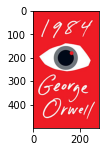

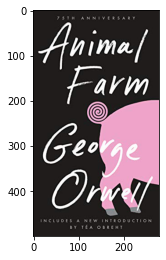

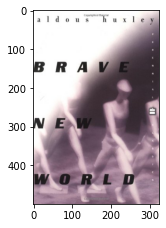

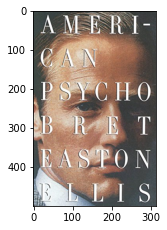

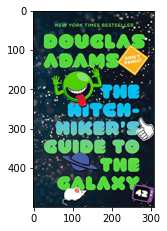

In [69]:
name=input("ENTER BOOK NAME")
recommend(name)